# Maps of mortality rates.

In [1]:
import util
import pandas as pd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pathlib
from matplotlib.patches import Patch

## Loading data

In [2]:
df = pd.read_csv('data/output/df_base_without_missing_points.csv', index_col=0)

In [3]:
df

,code_municipality_7,municipality,region,population,latitude,longitude,code_municipality_6,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,1100015,Alta Floresta D'Oeste (RO),Norte,21495,-11.935540,-61.999824,110001,29.276576,29.309142,26.871365,...,34.73,6.07,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67
1,1100023,Ariquemes (RO),Norte,96833,-9.908463,-63.033269,110002,29.736763,33.135398,25.601809,...,27.66,5.11,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18
2,1100031,Cabixi (RO),Norte,5363,-13.499763,-60.544314,110003,27.428678,24.855491,28.305053,...,32.98,2.90,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09
3,1100049,Cacoal (RO),Norte,86895,-11.433865,-61.442944,110004,27.389378,33.099718,26.171817,...,24.97,6.28,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74
4,1100056,Cerejeiras (RO),Norte,15890,-13.195033,-60.818426,110005,28.445563,30.780365,26.085588,...,28.46,5.72,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),Centro-Oeste,14956,-16.742081,-48.513471,522200,27.360257,29.459749,28.450120,...,26.44,4.03,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11
5566,5222054,Vicentinópolis (GO),Centro-Oeste,8768,-17.732662,-49.807239,522205,28.592609,32.744069,26.881843,...,17.41,6.23,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07
5567,5222203,Vila Boa (GO),Centro-Oeste,4215,-15.034889,-47.057361,522220,33.618031,29.822064,24.578885,...,13.70,8.93,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49
5568,5222302,Vila Propício (GO),Centro-Oeste,5815,-15.454635,-48.882422,522230,28.323302,26.672399,29.062769,...,23.59,4.46,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46


In [4]:
try:
    filename_map_municipalities = 'data/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/map_states_2010.geojson', driver='GeoJSON')

In [5]:
df_map_municipalities = map_municipalities.merge(df, how="left", left_on="code_muni", right_on="code_municipality_7")

In [6]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == False]

## Map visualizations

In [7]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-7-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-7-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-7-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-7-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results from 'c

In [9]:
selected_attributes = df_map_municipalities.columns[12:]
selected_attributes

Index(['percentage_population_age_range_0_19',
       'percentage_population_age_range_20_39',
       'percentage_population_age_range_40_59',
       'percentage_population_age_range_60_more',
       'percentage_urban_population', 'average_residents_per_households',
       'percentage_population_in_households_more_2_residents_per_bedroom',
       'percentage_male_population', 'percentage_indigenous_population',
       'percentage_black_and_brown_population', 'life_expectancy_at_birth',
       'density_median_effectively_domiciled_area', 'per_capita_income',
       'gini', 'per_capita_cash_transfer_program',
       'percentage_estimated_households_in_informal_settlements',
       'percentage_population_in_informal_settlements',
       'demographic_density_in_informal_settlements',
       'percentage_population_in_households_without_bathroom',
       'percentage_hospitalizations_diseases_inadequate_sanitation',
       'activity_rate', 'percentage_self_employed_workers',
       'unemploym

In [10]:
list(selected_attributes)

['percentage_population_age_range_0_19',
 'percentage_population_age_range_20_39',
 'percentage_population_age_range_40_59',
 'percentage_population_age_range_60_more',
 'percentage_urban_population',
 'average_residents_per_households',
 'percentage_population_in_households_more_2_residents_per_bedroom',
 'percentage_male_population',
 'percentage_indigenous_population',
 'percentage_black_and_brown_population',
 'life_expectancy_at_birth',
 'density_median_effectively_domiciled_area',
 'per_capita_income',
 'gini',
 'per_capita_cash_transfer_program',
 'percentage_estimated_households_in_informal_settlements',
 'percentage_population_in_informal_settlements',
 'demographic_density_in_informal_settlements',
 'percentage_population_in_households_without_bathroom',
 'percentage_hospitalizations_diseases_inadequate_sanitation',
 'activity_rate',
 'percentage_self_employed_workers',
 'unemployment_rate',
 'percentage_informal_workers',
 'percentage_poor_population_spending_more_1_hour_to_

In [11]:
labels = [
    "% population 0-19 years",
    "% population 20-39 years",
    "% population 40-59 years",
    "% population 60+ years",
    "% urban population",
    "Average household size",
    "% crowded households",
    "% male population",
    "% Indigenous population",
    "% black and brown \npopulation",
    "Life expectancy (years)",
    "Median density of\neffectively domiciled areas\n(inhabitants/km²)",
    "Per capita income (BRL)",
    "Gini coefficient",
    "Social transfer per \ncapita (BRL)",
    "% informal settlement \nhouseholds",
    "% population in informal \nsettlements",
    "Population density in \ninformal settlement (inhabitants/ha)",
    "% households without \nbathroom",
    "% sanitation-related \nhospitalizations",
    "Activity rate",
    "% self-employed workers",
    "Unemployment rate",
    "% informal workers",
    "% poor population \nspending 1+ hour to work",
    "% agriculture workers",
    "% commerce workers",
    "% service workers",
    "% industry workers",
    "Illiteracy rate",
    "Expected years of \nschooling at age 18"
]

# Concatenate letters to each item
labels = [f"{int(1 + i)}. {label}" for i, label in enumerate(labels)]

labels


['1. % population 0-19 years',
 '2. % population 20-39 years',
 '3. % population 40-59 years',
 '4. % population 60+ years',
 '5. % urban population',
 '6. Average household size',
 '7. % crowded households',
 '8. % male population',
 '9. % Indigenous population',
 '10. % black and brown \npopulation',
 '11. Life expectancy (years)',
 '12. Median density of\neffectively domiciled areas\n(inhabitants/km²)',
 '13. Per capita income (BRL)',
 '14. Gini coefficient',
 '15. Social transfer per \ncapita (BRL)',
 '16. % informal settlement \nhouseholds',
 '17. % population in informal \nsettlements',
 '18. Population density in \ninformal settlement (inhabitants/ha)',
 '19. % households without \nbathroom',
 '20. % sanitation-related \nhospitalizations',
 '21. Activity rate',
 '22. % self-employed workers',
 '23. Unemployment rate',
 '24. % informal workers',
 '25. % poor population \nspending 1+ hour to work',
 '26. % agriculture workers',
 '27. % commerce workers',
 '28. % service workers',


In [12]:
def plot_map_mortality(df, width=43.33, height=60.66, nrows=7, ncols=5, filename_extra='',
                       columns=selected_attributes, titles=labels):
    df = df.copy()

    linewidth_estados = 0.4
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(width), util.centimeter_to_inch(height)), 
                           nrows=nrows, ncols=ncols, subplot_kw=dict(aspect='equal'))
    ax = ax.ravel()

    for j in range(len(columns)):
        column = columns[j]
        label = titles[j]
        ax_atual = ax[j]

        missing_kwds = dict(color='#FFC0CB', label='No data')

        df.plot(
            column=column,
            cmap='Blues',
            legend=True,
            legend_kwds={"label": label, "orientation": "horizontal", "pad": 0.05, "shrink": 0.7,"location": "top"},
            edgecolor="gray",
            linewidth=linewidth_municipios,
            categorical=False,
            missing_kwds=missing_kwds,
            ax=ax_atual
        )

        map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax_atual)
        ax_atual.axis("off")

    # Remove extra subplots if `columns` doesn't fully occupy grid
    for idx in range(len(columns), nrows * ncols):
        fig.delaxes(ax[idx])

    # Adding a legend entry for missing data
    missing_patch = Patch(color='#FFC0CB', label='No data')    
    fig.legend(handles=[missing_patch], loc='upper center', bbox_to_anchor=(0.5, 1.025), frameon=True)

    fig.tight_layout()

    fig.savefig(f'images/map_sociodemographic_variables{filename_extra}.png', bbox_inches="tight")

    plt.show()

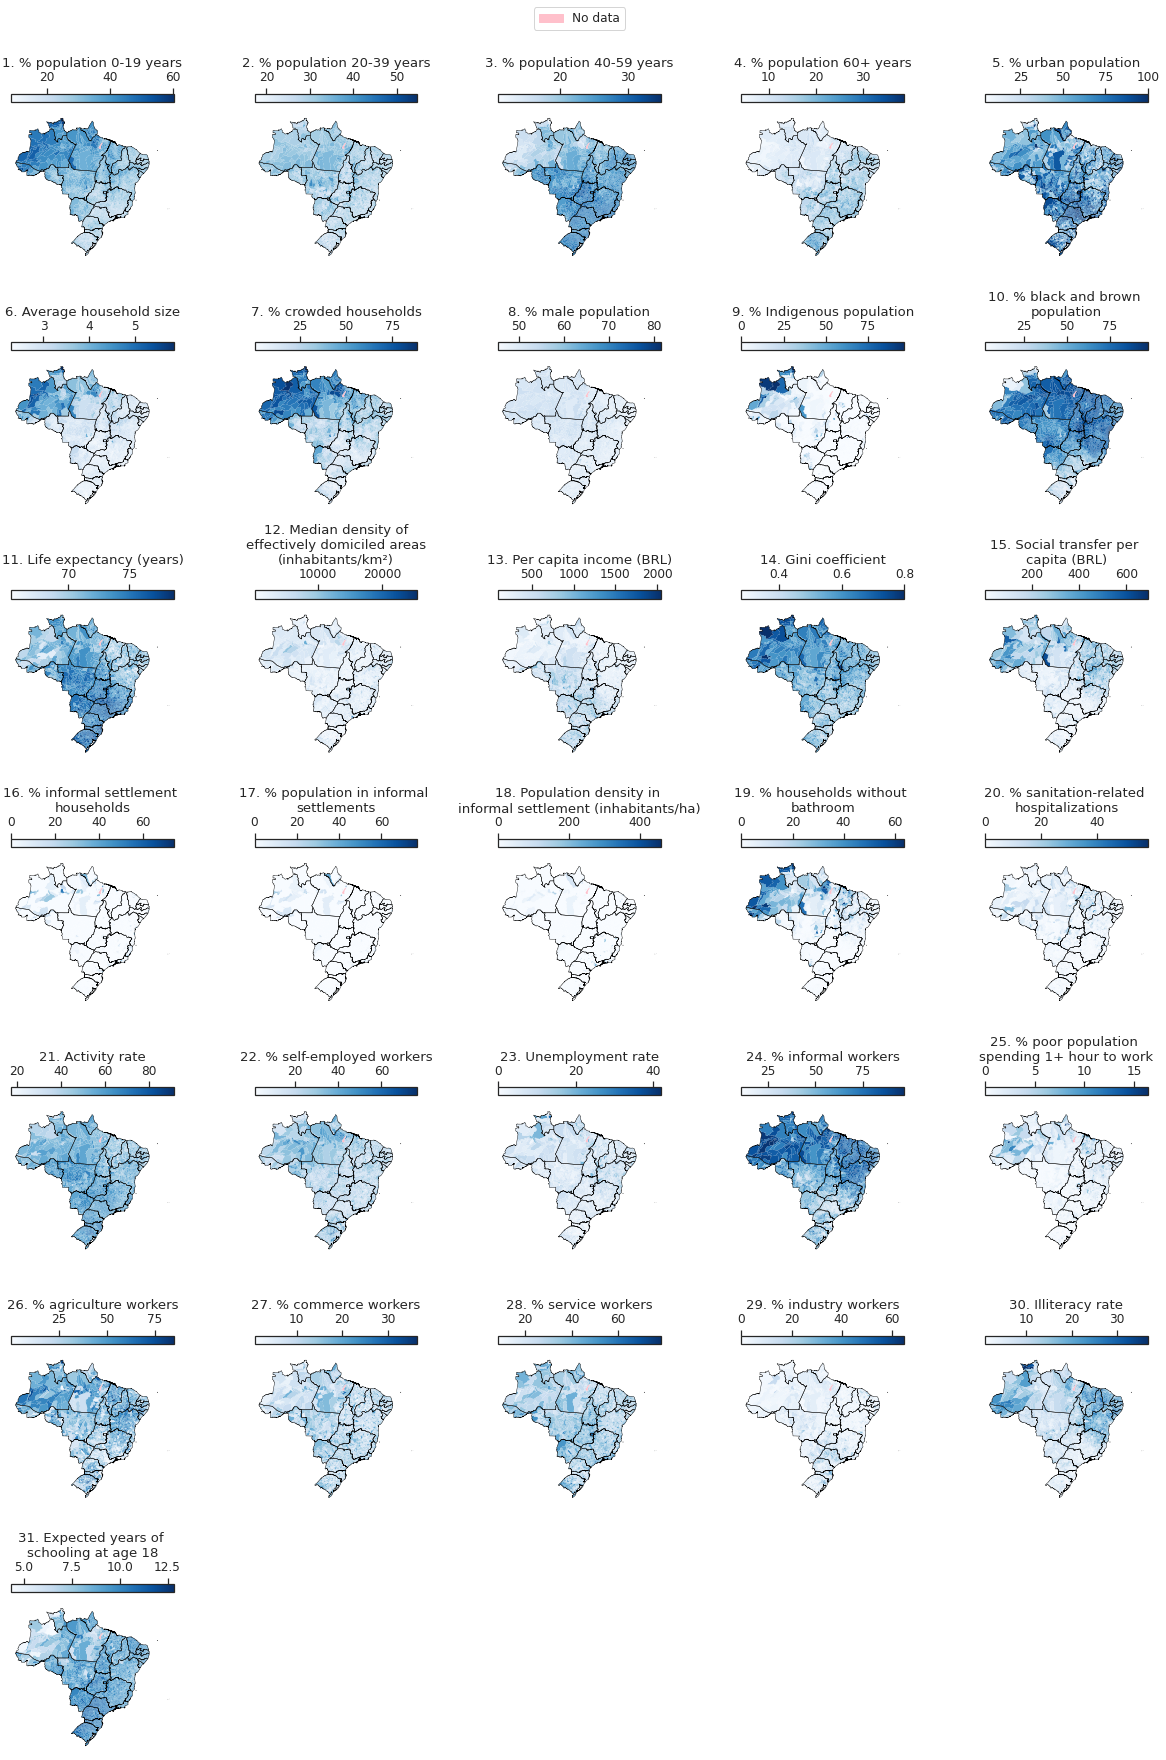

In [13]:
plot_map_mortality(df_map_municipalities, filename_extra='_ignoring_outliers')